In [6]:
import pandas as pd
import numpy as np

In [14]:
# auto-mpg.csv 파일을 load
# hosrsepower의 데이터 타입을 float 형으로 형변환
# 형변환 할 수 없는 자료의 행을 제가
# origin 1, 2, 3-> 1:USA, 2: EA, 3:JPN으로 변경, category로 변경

df = pd.read_csv('./dataset/auto-mpg.csv')
print(df.head())

df.columns = [ 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration',
              'model year', 'origin', 'name']

df['horsepower'].replace('?', np.nan, inplace = True)
print(df['horsepower'].unique())
df.dropna(subset=['horsepower'], axis = 0, inplace=True)
print(df['horsepower'].unique())

df['horsepower'] = df['horsepower'].astype('float')
df.dtypes

df['origin'].replace({1:'USA', 2:'EU', 3:'JPN'}, inplace=True)
df['origin'] = df['origin'].astype('category')
print(df.dtypes)

   18.0  8  307.0  130.0   3504.  12.0  70  1 chevrolet chevelle malibu
0  15.0  8  350.0  165.0  3693.0  11.5  70  1         buick skylark 320
1  18.0  8  318.0  150.0  3436.0  11.0  70  1        plymouth satellite
2  16.0  8  304.0  150.0  3433.0  12.0  70  1             amc rebel sst
3  17.0  8  302.0  140.0  3449.0  10.5  70  1               ford torino
4  15.0  8  429.0  198.0  4341.0  10.0  70  1          ford galaxie 500
['165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0' '170.0'
 '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00' '113.0'
 '200.0' '210.0' '193.0' nan '100.0' '105.0' '175.0' '153.0' '180.0'
 '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00' '80.00'
 '54.00' '208.0' '155.0' '130.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102

In [18]:
# np.histogram() 함수를 사용하면 각 구간의 경계선을 구할 수 있음
count, bin_dividers = np.histogram(df['horsepower'], bins=3)

#  46.         107.33333333 168.66666667 230. 
# 46 가장 적은 수, x < 107이면 저출력, 107 < x < 168이면 보통출력, 168 이상이면 고출력인데 최대 출력은 230 
print(count, bin_dividers)

# pd.cut() 함수로 각각 데이터를 3개의 bin에 할당
# bin의 이름 정함
bin_names = ['저출력', '보통출력', '고출력']
df['hp_bin'] = pd.cut(x = df['horsepower'], # 데이터 배열
                      bins = bin_dividers, # 경계값 리스트
                      labels = bin_names, # bin의 이름
                      include_lowest = True # 첫 경계값 포함 여부
                     )

df[['horsepower', 'hp_bin']].head(10)

[257 102  32] [ 46.         107.33333333 168.66666667 230.        ]


,horsepower,hp_bin
0,165.0,보통출력
1,150.0,보통출력
2,150.0,보통출력
3,140.0,보통출력
4,198.0,고출력
5,220.0,고출력
6,215.0,고출력
7,225.0,고출력
8,190.0,고출력
9,170.0,고출력


In [19]:
# dummy 변수 
hp_dummies = pd.get_dummies(df['hp_bin'])
hp_dummies.head(10)

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [25]:
# 머신러닝 분석을 위한 라이브러리 sklearn -> 딥러닝tensorflow, keras
from sklearn import preprocessing # 전처리 모듈
# 전처리를 위한 encoder
lavel_encoder = preprocessing.LabelEncoder() # 클래스 instance 생성 label encoder
onehot_encoder = preprocessing.OneHotEncoder() # one hot encoder 생성

# label encoder로 문자형 범쥐를 숫자형 범주로 변환
onehot_labeled = lavel_encoder.fit_transform(df['hp_bin'].head(15))
print(onehot_labeled)

# onehot_labeled 을 2차원 배열로 변경
# 0이면 0, 0, 1  고출력
# 1이면 0, 1, 0  일반출력
# 2이면 1, 0, 0  저출력
# [[1]
#  [1]
#  [1]
#  [1]
#  [0]
#  [0]
#  [0]
#  [0]
#  [0]
#  [0]
#  [1]
#  [1]
#  [0]
#  [2]
#  [2]]
onehot_reshape = onehot_labeled.reshape(len(onehot_labeled), 1)
print(onehot_reshape)

# 희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshape) 
print(onehot_fitted)

[1 1 1 1 0 0 0 0 0 0 1 1 0 2 2]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [2]]
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 0)	1.0
  (13, 2)	1.0
  (14, 2)	1.0


In [30]:
# 정규화 : 모든 실수를 0-1 또는 -1~1 사이의 수로 변환 해주는 작업
# DB의 정규화라는 다른 의미인 것을 유념한다.

# 해당 열의 최대값으로 도든 데이터를 나누어 저장
df['h_1'] = df.horsepower / abs(df.horsepower.max())
print(df[['horsepower', 'h_1']])

# 해당 열의 (최대값 - 최소값)으로 도든 데이터를 나누어 저장
df['h_1'] = df.horsepower / abs(df.horsepower.max() - df.horsepower.min())
print(df[['horsepower', 'h_1']])

     horsepower       h_1
0         165.0  0.717391
1         150.0  0.652174
2         150.0  0.652174
3         140.0  0.608696
4         198.0  0.860870
..          ...       ...
392        86.0  0.373913
393        52.0  0.226087
394        84.0  0.365217
395        79.0  0.343478
396        82.0  0.356522

[391 rows x 2 columns]
     horsepower       h_1
0         165.0  0.896739
1         150.0  0.815217
2         150.0  0.815217
3         140.0  0.760870
4         198.0  1.076087
..          ...       ...
392        86.0  0.467391
393        52.0  0.282609
394        84.0  0.456522
395        79.0  0.429348
396        82.0  0.445652

[391 rows x 2 columns]


In [53]:
# 시계열 데이터
df = pd.read_csv('./dataset/stock-data.csv')

df.head()
df.info()

# Date 컬럼의 자료를 new_Date로 datetime 형식으로 
df['new_Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(

In [54]:
# new_Date 컬럼을 index로 설정
# Date 컬럼을 삭제
df.set_index('new_Date', inplace=True )
df.drop('Date', axis=1, inplace=True)
df.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [55]:
dates = ['2019-01-01', '2020-03-01', '2021-06-01']
type(dates[0])
# str을 timestamp로 변환 : datetime
ts_dates = pd.to_datetime(dates)

ts_day = ts_dates.to_period(freq='A') # freq = 'D' 날짜, 'M' 월, 'A' 연도
ts_day


PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]')

In [57]:
# 날짜를 분리
df = pd.read_csv('./dataset/stock-data.csv')

# Date 컬럼의 자료를 new_Date로 datetime 형식으로 
df['new_Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['day'] = df['new_Date'].dt.day
df.head()



,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26


In [60]:
# 종가, 시작가, 연 월, 일, new_Dat만 추출 -> df_stock 에 저장, new_date를 인덱스에 설정
df_stock = df.loc[:, ['Close', 'Start', 'Year', 'Month', 'day', 'new_Date']]
df_stock.set_index('new_Date', inplace = True)
df_stock

,Close,Start,Year,Month,day
new_Date,,,,,
2018-07-02,10100,10850,2018,7,2
2018-06-29,10700,10550,2018,6,29
2018-06-28,10400,10900,2018,6,28
2018-06-27,10900,10800,2018,6,27
2018-06-26,10800,10900,2018,6,26
2018-06-25,11150,11400,2018,6,25
2018-06-22,11300,11250,2018,6,22
2018-06-21,11200,11350,2018,6,21
2018-06-20,11550,11200,2018,6,20


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9932/4128241186.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_stock.index, rotation=90)


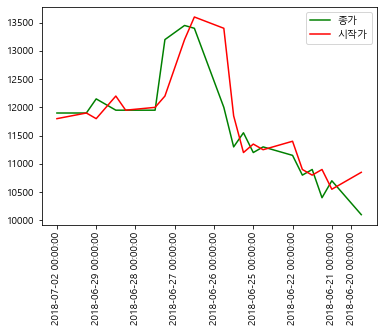

In [70]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')  # 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(df_stock.index, df_stock['Close'], label='종가',  color='green')
ax.plot(df_stock.index, df_stock['Start'], label='시작가',  color='red')
ax.legend(loc='best')
ax.set_xticklabels(df_stock.index, rotation=90)
plt.show()